#### Loading movie ratings dataset

Loading movie ratings dataset.

Average rating for movie 1 (Toy Story): 3.878319 / 5



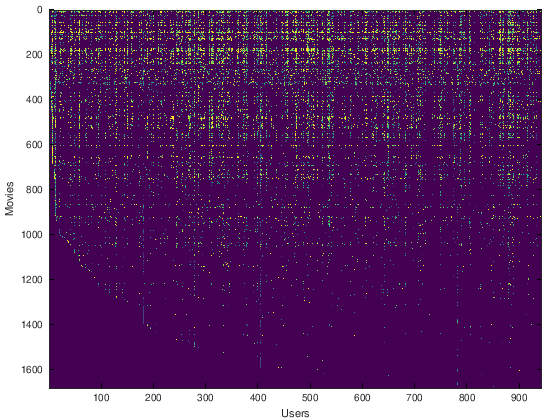

In [1]:
%  You will start by loading the movie ratings dataset to understand the
%  structure of the data.
%  
fprintf('Loading movie ratings dataset.\n\n');

%  Load data
load ('ex8_movies.mat');

%  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 
%  943 users
%
%  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
%  rating to movie i

%  From the matrix, we can compute statistics like average rating.
fprintf('Average rating for movie 1 (Toy Story): %f / 5\n\n', ...
        mean(Y(1, R(1, :))));

%  We can "visualize" the ratings matrix by plotting it with imagesc
imagesc(Y);
ylabel('Movies');
xlabel('Users');

#### Collaborative Filtering Cost Function

In [14]:
%  You will now implement the cost function for collaborative filtering.
%  To help you debug your cost function, we have included set of weights
%  that we trained on that. Specifically, you should complete the code in 
%  cofiCostFunc.m to return J.

%  Load pre-trained weights (X, Theta, num_users, num_movies, num_features)
load ('ex8_movieParams.mat');

%  Reduce the data set size so that this runs faster
num_users = 4; num_movies = 5; num_features = 3;
X = X(1:num_movies, 1:num_features);
Theta = Theta(1:num_users, 1:num_features);
Y = Y(1:num_movies, 1:num_users);
R = R(1:num_movies, 1:num_users);

%  Evaluate cost function
J = cofiCostFunc([X(:) ; Theta(:)], Y, R, num_users, num_movies, ...
               num_features, 0);
           
fprintf(['Cost at loaded parameters: %f '...
         '\n(this value should be about 22.22)\n'], J);

Cost at loaded parameters: 22.224604 
(this value should be about 22.22)


#### Collaborative Filtering Gradient

In [24]:
%  Once your cost function matches up with ours, you should now implement 
%  the collaborative filtering gradient function. Specifically, you should 
%  complete the code in cofiCostFunc.m to return the grad argument.
%  
fprintf('\nChecking Gradients (without regularization) ... \n');

%  Check gradients by running checkNNGradients
checkCostFunction;


Checking Gradients (without regularization) ... 
   1.8621196   1.8621196
   0.5282698   0.5282698
  -6.6349568  -6.6349568
   1.6511619   1.6511619
   1.2686085   1.2686085
   0.3598950   0.3598950
  -4.8488580  -4.8488580
   0.9711817   0.9711817
  -0.4579573  -0.4579573
  -0.1299191  -0.1299191
  -0.6160607  -0.6160607
  -0.5606606  -0.5606606
   1.4597477   1.4597477
  -2.2226293  -2.2226293
  -0.3118410  -0.3118410
  -2.5109823  -2.5109823
   2.1200340   2.1200340
   0.6712632   0.6712632
  -0.8744925  -0.8744925
  -0.1226937  -0.1226937
  -2.8642081  -2.8642081
   0.8341264   0.8341264
  -0.3129979  -0.3129979
   0.0160037   0.0160037
   0.0022454   0.0022454
   0.3765541   0.3765541
  -0.0152649  -0.0152649
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)

If your cost function implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 7.77501e-13


#### Collaborative Filtering Cost Regularization

In [27]:
%  Now, you should implement regularization for the cost function for 
%  collaborative filtering. You can implement it by adding the cost of
%  regularization to the original cost computation.
%  

%  Evaluate cost function
J = cofiCostFunc([X(:) ; Theta(:)], Y, R, num_users, num_movies, ...
               num_features, 1.5);
           
fprintf(['Cost at loaded parameters (lambda = 1.5): %f '...
         '\n(this value should be about 31.34)\n'], J);

Cost at loaded parameters (lambda = 1.5): 31.344056 
(this value should be about 31.34)


#### Collaborative Filtering Gradient Regularization

In [30]:
%  Once your cost matches up with ours, you should proceed to implement 
%  regularization for the gradient. 
%

%  
fprintf('\nChecking Gradients (with regularization) ... \n');

%  Check gradients by running checkNNGradients
checkCostFunction(1.5);


Checking Gradients (with regularization) ... 
   0.183347   0.183347
   3.114588   3.114588
   2.426937   2.426937
   2.385293   2.385293
  -2.189441  -2.189441
   1.065957   1.065957
  -4.196640  -4.196640
   7.016242   7.016242
   4.512425   4.512425
  -4.393751  -4.393751
   1.548989   1.548989
  -5.412034  -5.412034
   0.068345   0.068345
   1.473577   1.473577
  -1.425450  -1.425450
   2.404517   2.404517
  -0.655447  -0.655447
   0.077314   0.077314
  -3.400561  -3.400561
  -5.207318  -5.207318
   2.213515   2.213515
   2.479407   2.479407
   2.972371   2.972371
   1.552328   1.552328
   3.917613   3.917613
  -6.125287  -6.125287
  -3.314252  -3.314252
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)

If your cost function implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 2.81948e-12


#### Entering ratings for a new user

In [31]:
%  Before we will train the collaborative filtering model, we will first
%  add ratings that correspond to a new user that we just observed. This
%  part of the code will also allow you to put in your own ratings for the
%  movies in our dataset!
%
movieList = loadMovieList();

%  Initialize my ratings
my_ratings = zeros(1682, 1);

% Check the file movie_idx.txt for id of each movie in our dataset
% For example, Toy Story (1995) has ID 1, so to rate it "4", you can set
my_ratings(1) = 4;

% Or suppose did not enjoy Silence of the Lambs (1991), you can set
my_ratings(98) = 2;

% We have selected a few movies we liked / did not like and the ratings we
% gave are as follows:
my_ratings(7) = 3;
my_ratings(12)= 5;
my_ratings(54) = 4;
my_ratings(64)= 5;
my_ratings(66)= 3;
my_ratings(69) = 5;
my_ratings(183) = 4;
my_ratings(226) = 5;
my_ratings(355)= 5;

fprintf('\n\nNew user ratings:\n');
for i = 1:length(my_ratings)
    if my_ratings(i) > 0 
        fprintf('Rated %d for %s\n', my_ratings(i), ...
                 movieList{i});
    end
end



New user ratings:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
Rated 5 for Sphere (1998)


#### Learning Movie Ratings

In [32]:
%  Now, you will train the collaborative filtering model on a movie rating 
%  dataset of 1682 movies and 943 users
%

fprintf('\nTraining collaborative filtering...\n');

%  Load data
load('ex8_movies.mat');

%  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies by 
%  943 users
%
%  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
%  rating to movie i

%  Add our own ratings to the data matrix
Y = [my_ratings Y];
R = [(my_ratings ~= 0) R];

%  Normalize Ratings
[Ynorm, Ymean] = normalizeRatings(Y, R);

%  Useful Values
num_users = size(Y, 2);
num_movies = size(Y, 1);
num_features = 10;

% Set Initial Parameters (Theta, X)
X = randn(num_movies, num_features);
Theta = randn(num_users, num_features);

initial_parameters = [X(:); Theta(:)];

% Set options for fmincg
options = optimset('GradObj', 'on', 'MaxIter', 100);

% Set Regularization
lambda = 10;
theta = fmincg (@(t)(cofiCostFunc(t, Ynorm, R, num_users, num_movies, ...
                                num_features, lambda)), ...
                initial_parameters, options);

% Unfold the returned theta back into U and W
X = reshape(theta(1:num_movies*num_features), num_movies, num_features);
Theta = reshape(theta(num_movies*num_features+1:end), ...
                num_users, num_features);

fprintf('Recommender system learning completed.\n');


Training collaborative filtering...
Iteration   100 | Cost: 3.895512e+04
Recommender system learning completed.


#### Recommendation for you

In [33]:
%  After training the model, you can now make recommendations by computing
%  the predictions matrix.
%

p = X * Theta';
my_predictions = p(:,1) + Ymean;

movieList = loadMovieList();

[r, ix] = sort(my_predictions, 'descend');
fprintf('\nTop recommendations for you:\n');
for i=1:10
    j = ix(i);
    fprintf('Predicting rating %.1f for movie %s\n', my_predictions(j), ...
            movieList{j});
end

fprintf('\n\nOriginal ratings provided:\n');
for i = 1:length(my_ratings)
    if my_ratings(i) > 0 
        fprintf('Rated %d for %s\n', my_ratings(i), ...
                 movieList{i});
    end
end


Top recommendations for you:
Predicting rating 5.0 for movie Aiqing wansui (1994)
Predicting rating 5.0 for movie Marlene Dietrich: Shadow and Light (1996)
Predicting rating 5.0 for movie Someone Else's America (1995)
Predicting rating 5.0 for movie Entertaining Angels: The Dorothy Day Story (1996)
Predicting rating 5.0 for movie Star Kid (1997)
Predicting rating 5.0 for movie Great Day in Harlem, A (1994)
Predicting rating 5.0 for movie Saint of Fort Washington, The (1993)
Predicting rating 5.0 for movie Prefontaine (1997)
Predicting rating 5.0 for movie They Made Me a Criminal (1939)
Predicting rating 5.0 for movie Santa with Muscles (1996)


Original ratings provided:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)